In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
dataset = pd.read_csv('./time-series/data/Network Analytics.csv', index_col=['Timestamp'], parse_dates=['Timestamp'])

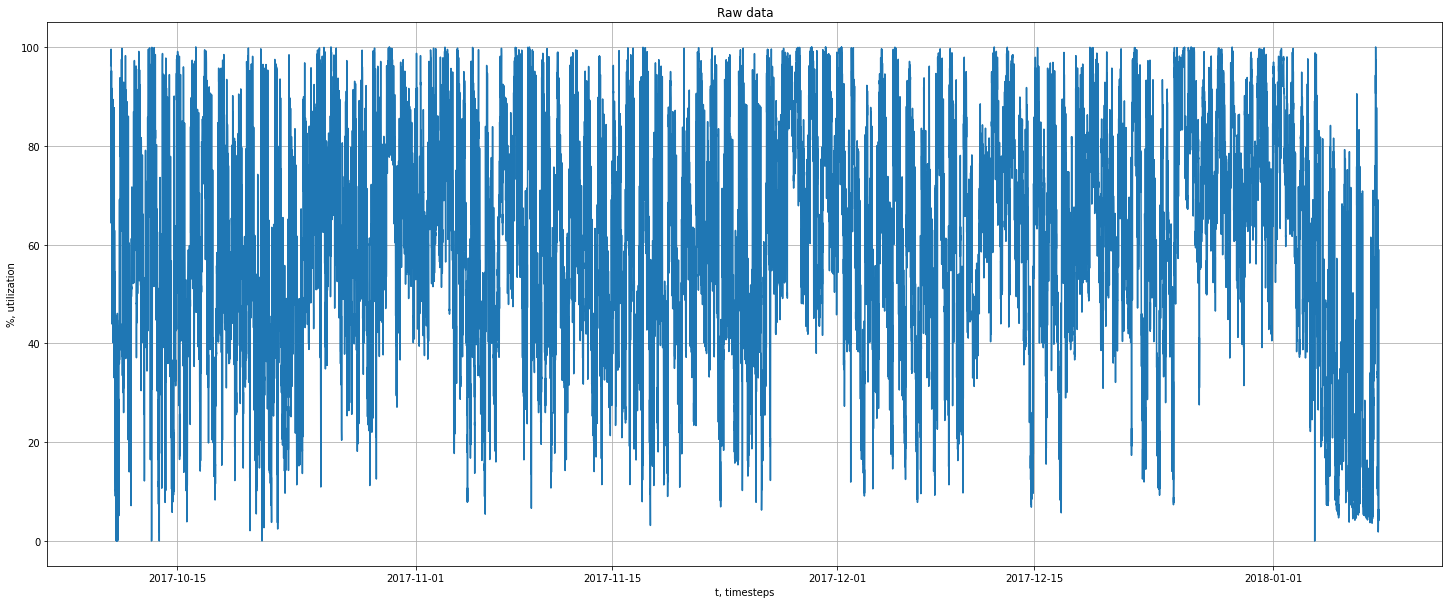

In [18]:
plt.figure(figsize=(25, 10))
plt.plot(dataset)
plt.grid('on')
plt.xlabel('t, timesteps')
plt.ylabel('%, utilization')
plt.title('Raw data')
plt.show()

In [7]:
def hour_smooth(data):
    current_datetime = data.index[1]
    utilization_hour_sum, measurement_count = 0, 0
    result_dict = {}
    for index, row in dataset.iterrows():
        if index.hour != current_datetime.hour:

            new_tiestamp = pd.Timestamp(year=current_datetime.year, month=current_datetime.month, day=current_datetime.day, hour=current_datetime.hour)
            new_value = utilization_hour_sum / measurement_count
            result_dict[new_tiestamp] = new_value

            current_datetime = index
            utilization_hour_sum = row["OutboundUtilzation (%)"]
            measurement_count = 1
        else:
            utilization_hour_sum += row["OutboundUtilzation (%)"]
            measurement_count += 1
    return pd.DataFrame.from_dict(result_dict, orient="index", columns=["utilization"])

In [8]:
resampled_data = hour_smooth(dataset)

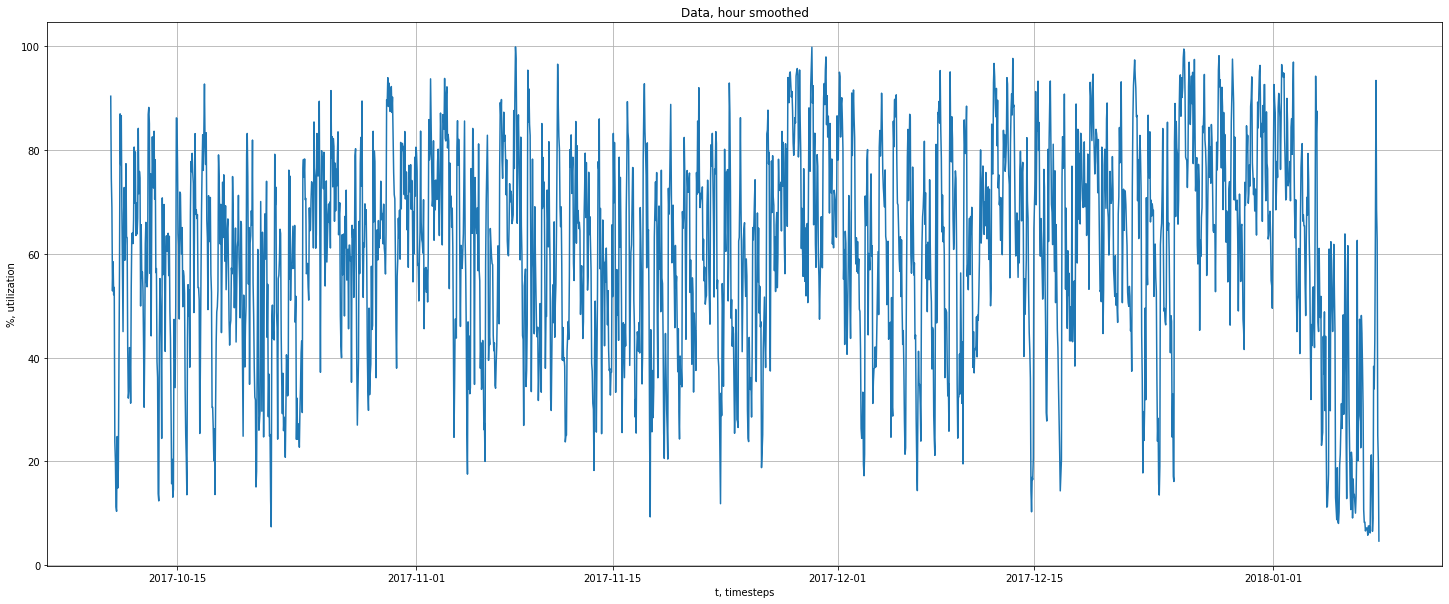

In [22]:
plt.figure(figsize=(25, 10))
plt.plot(resampled_data)
plt.grid('on')
plt.xlabel('t, timesteps')
plt.ylabel('%, utilization')
plt.title('Data, hour smoothed')
plt.show()

In [45]:
cut_data = resampled_data[:-100]

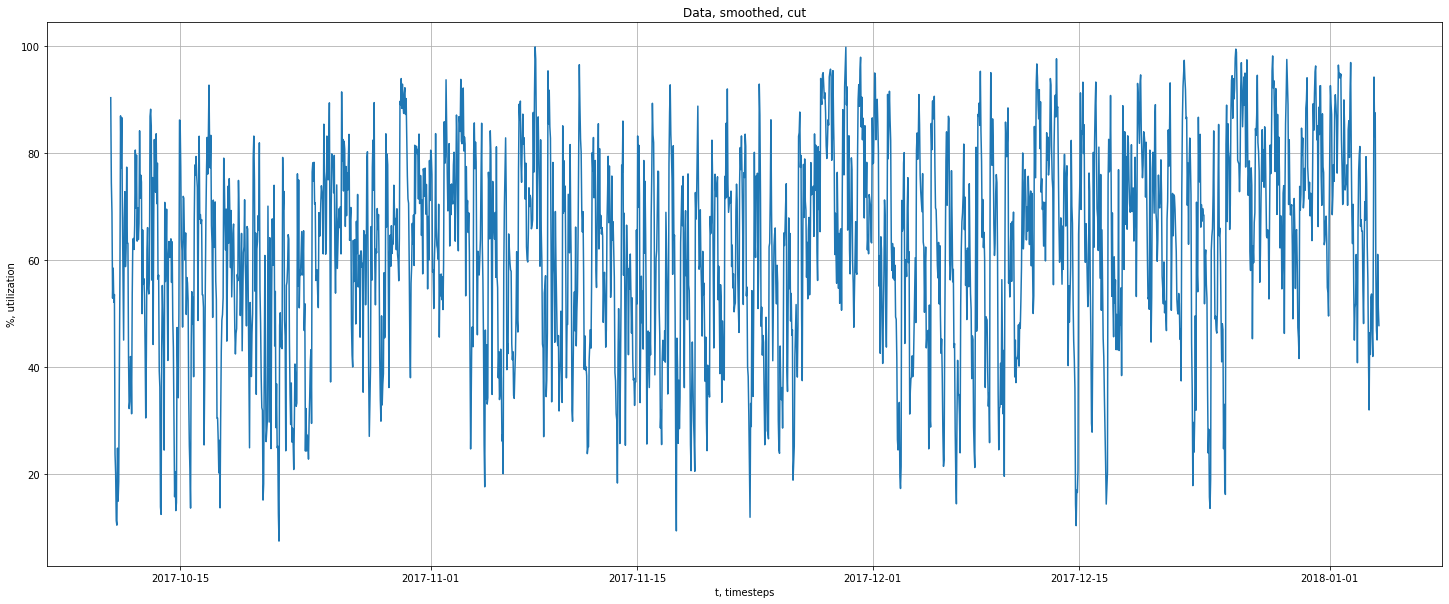

In [50]:
plt.figure(figsize=(25, 10))
plt.plot(cut_data)
plt.grid('on')
plt.xlabel('t, timesteps')
plt.ylabel('%, utilization')
plt.title('Data, smoothed, cut')
plt.show()

In [51]:
resampled_data.head()

,utilization
2017-10-10 07:00:00,90.397000
2017-10-10 08:00:00,74.493000
2017-10-10 09:00:00,68.930125
2017-10-10 10:00:00,52.874208
2017-10-10 11:00:00,58.498275


In [53]:
cut_data.head()

,utilization
2017-10-10 07:00:00,90.397000
2017-10-10 08:00:00,74.493000
2017-10-10 09:00:00,68.930125
2017-10-10 10:00:00,52.874208
2017-10-10 11:00:00,58.498275


In [54]:
dataset.head()

,OutboundUtilzation (%)
Timestamp,
2017-10-10 07:01:00,96.2442
2017-10-10 07:21:00,99.1131
2017-10-10 07:26:00,97.2892
2017-10-10 07:31:00,98.0286
2017-10-10 07:36:00,99.5263


In [61]:
resampled_data.to_csv('./time-series/data/network-analytics-smmothed.csv', index_label=['Timestamp'])
cut_data.to_csv('./time-series/data/network-analytics-smmothed-cut.csv', index_label=['Timestamp'])